In [4]:
import geopandas as gpd
driveways_polygons = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/OSM/processed/brandenburg_polygons.geojson")

driveway_polygon = driveways_polygons.copy().loc[driveways_polygons.link_id == "BB_ML_0001"]
driveway_polygon.geometry = driveway_polygon.geometry.geometry.apply(lambda x: x.buffer(-10))
driveway_polygon = driveway_polygon.dissolve()

In [56]:
borders = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/borders/gadm41_DEU_1.json")

In [58]:
state_borders = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/borders/gadm41_DEU_1.json")

In [90]:
driveways = gpd.read_file(f"/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/OSM/processed/brandenburg.geojson").\
        dissolve(by = "link_id", as_index = False)

In [98]:
import shapely
bbox = driveways.loc[driveways.link_id == "BB_ML_0004",:].dissolve(by = "link_id", as_index = False).bounds.iloc[0,:]
bbox_polygon = shapely.geometry.Polygon([(bbox[0], bbox[1]),
                            (bbox[0], bbox[3]),
                            (bbox[2], bbox[3]),
                            (bbox[2], bbox[1])])

In [100]:
state_borders.to_crs("25833").intersects(gpd.GeoSeries([bbox_polygon] * state_borders.shape[0], crs = "25833")).sum()

2

0    POLYGON ((329409.468 5889680.297, 329409.468 5...
dtype: geometry

In [59]:
state_borders

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,DEU.1_1,DEU,Germany,Baden-Württemberg,NA,NA,Land,State,08,DE.BW,NA,"MULTIPOLYGON (((-61.052 5290041.924, -1678.879..."
1,DEU.2_1,DEU,Germany,Bayern,Bavaria,NA,Freistaat,FreeState,09,DE.BY,DE-BY,"MULTIPOLYGON (((229623.955 5266466.926, 229443..."
2,DEU.3_1,DEU,Germany,Berlin,NA,NA,Land,State,11,DE.BE,DE-BE,"MULTIPOLYGON (((398455.088 5830366.477, 398204..."
3,DEU.4_1,DEU,Germany,Brandenburg,NA,NA,Land,State,12,DE.BR,DE-BB,"MULTIPOLYGON (((383381.742 5699724.679, 383624..."
4,DEU.5_1,DEU,Germany,Bremen,NA,NA,FreieHansestadt,State,04,DE.HB,DE-HB,"MULTIPOLYGON (((77518.337 5910782.890, 77536.4..."
5,DEU.6_1,DEU,Germany,Hamburg,NA,NA,FreieundHansestadt,State,02,DE.HH,DE-HH,"MULTIPOLYGON (((181696.597 5962191.613, 181590..."
6,DEU.7_1,DEU,Germany,Hessen,Hesse,NA,Land,State,06,DE.HE,DE-HE,"MULTIPOLYGON (((56688.783 5491808.165, 55723.1..."
7,DEU.8_1,DEU,Germany,Mecklenburg-Vorpommern,Mecklenburg-WestPomerania,NA,Land,State,13,DE.MV,DE-MV,"MULTIPOLYGON (((270703.252 5896434.382, 270664..."
8,DEU.9_1,DEU,Germany,Niedersachsen,LowerSaxony,NA,Land,State,03,DE.NI,DE-NI,"MULTIPOLYGON (((148505.547 5947852.468, 149258..."
9,DEU.10_1,DEU,Germany,Nordrhein-Westfalen,NorthRhine-Westphalia,NA,Land,State,05,DE.NW,DE-NW,"MULTIPOLYGON (((-98324.812 5614536.310, -99069..."


---
# Iridiation

In [1]:
import xarray
import rioxarray

irradiation = rioxarray.open_rasterio("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/SARAH/processed/gh_0_year.nc", mask_and_scale = True).rio.clip(borders.dissolve().geometry.values, drop = True)

NameError: name 'borders' is not defined

In [73]:
iridiation

<xarray.DataArray '__xarray_dataarray_variable__' (band: 1, y: 158, x: 118)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -1.388e+05 -1.333e+05 ... 4.943e+05 4.998e+05
  * y            (y) float64 6.108e+06 6.102e+06 ... 5.256e+06 5.251e+06
    spatial_ref  int64 0
Attributes:
    NETCDF_DIM_band_DEF:     [ 1. 10.]
    NETCDF_DIM_band_VALUES:  1
    NETCDF_DIM_EXTRA:        {band}

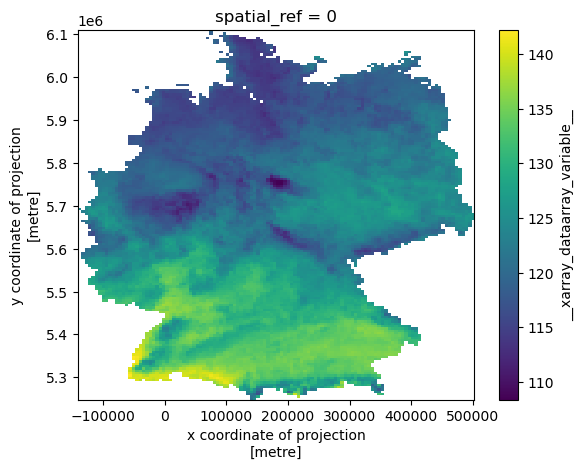

In [61]:
xarray.plot.imshow(iridiation.squeeze("band", drop = True))

In [68]:
def worker(x):
    if x != None:
        return (iridiation.sel(x = list(x.coords)[0][0], y = list(x.coords)[0][1], method = "nearest").values[0] / iridiation.max().values)
driveways_polygons.centroid.apply(worker) 

0       0.833333
1       0.833333
2       0.833333
3       0.833333
4       0.833333
          ...   
1261    0.865682
1262    0.865682
1263    0.865682
1264    0.865682
1265    0.865682
Length: 1266, dtype: float64

In [69]:
driveway_polygon.centroid.apply(worker) 

0    0.860056
dtype: float32

---
# Network Centrality

In [2]:
import pandas as pd
import geopandas as gpd
grid_connections = gpd.read_file("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/OSM/processed/brandenburg_substations.geojson")

In [20]:
def worker(x):
    if x is not None:
        return grid_connections.distance(x).min()   

In [32]:
driveways_polygons["distance"]= driveways_polygons.geometry.apply(lambda x: worker(x))

'BB'

---
# Terrain suitability

In [1]:
import xarray
import rioxarray

driveway = xarray.open_dataset("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/imagery/BB_ML_0001_2017-06-02.nc", drop_variables = ["red", "green", "blue"])

In [16]:
xr = xarray.combine_by_coords([rioxarray.open_rasterio("/pfs/work7/workspace/scratch/tu_zxobe27-ds_project/data/DGM/raw/dgm_" + grid.replace("_", "-")  + ".xyz") for grid in driveway.grids])
xr.rio.write_crs("25833", inplace = True)

<xarray.DataArray (band: 1, y: 2002, x: 3003)>
array([[[44.683, 44.69 , 44.732, ..., 36.284, 36.29 , 36.304],
        [44.717, 44.724, 44.741, ..., 36.308, 36.305, 36.304],
        [44.736, 44.759, 44.767, ..., 36.318, 36.317, 36.315],
        ...,
        [36.448, 36.446, 36.399, ..., 38.067, 38.073, 38.099],
        [36.392, 36.434, 36.42 , ..., 38.072, 38.1  , 38.116],
        [36.376, 36.387, 36.403, ..., 38.04 , 38.108, 38.138]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.13e+05 4.13e+05 4.13e+05 ... 4.16e+05 4.16e+05
  * y            (y) float64 5.797e+06 5.797e+06 ... 5.799e+06 5.799e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

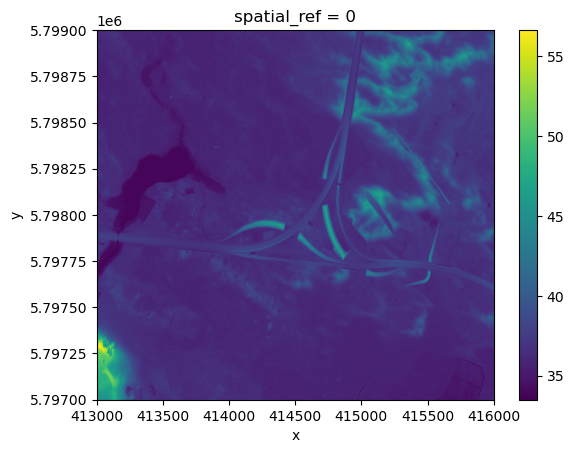

In [17]:
xarray.plot.imshow(xr.squeeze("band", drop = True))

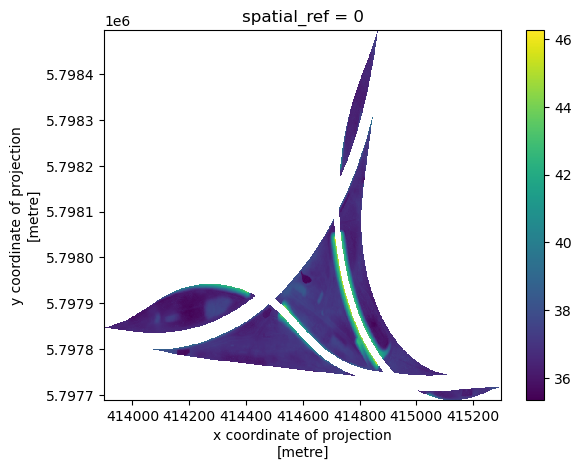

In [72]:
clipped = xr.rio.clip(driveway_polygons.geometry.values)
xarray.plot.imshow(clipped.squeeze("band", drop = True))

In [35]:
(1 - (clipped.std() / (clipped.max() - clipped.min()))).values

array(0.86541581)